In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'speed_vs_time_optmumlap_250.csv',
 'template.xlsm',
 'Teste.ipynb',
 'Teste]',
 '~$template.xlsm']

# Leitura parâmetros fixos

In [20]:
data = pd.read_excel('template.xlsm', sheet_name="Parâmetros Motor")

In [23]:
data.set_index('Parâmetro', inplace=True)

In [24]:
data

,Valor,Unidade
Parâmetro,,
potência nominal motor,6000.0000,W
corrente nominal motor,105.0000,A
corrente a vazio,85.0000,A
tensão nominal alimentação motor,72.0000,V
frequência nominal,150.0000,Hz
velocidade nominal,4380.0000,rpm
torque nominal,13.0000,Nm
resistência do estator R1,0.0078,Ohm
reatância do estator X1,0.0255,Ohm


In [52]:
res_rotor_r2 = data.loc['resistência do rotor R2', 'Valor']

## teste

In [3]:
base = pd.read_excel('template.xlsm', sheet_name="Entrada velocidade")

In [4]:
base

,speed,elapsedTime,elapsedDistance,lateralAcceleration,longitudinalAcceleration,gear,gearRatio,engineSpeed,torque,power,downForce,dragForce,tractionControl,throttlePosition,brakePosition,cornerRadius,sectorIndex,maximumCornerSpeed,loadSensitiveLatGrip,loadSensitiveLongGrip,yawangle,yawvelocity,yawacceleration,xposition,yposition,trackelevation,fz
0,3.600000,0.003714,0.1,2.427247,0.392464,1,8.89,1.000000,15.600000,19.716583,-0.022638,215.221967,0.0,58.570441,0.0,298.739130,1,96.940573,1.5,1.3,0.000000,0.000000e+00,0.000000e+00,-0.099984,0.001762,0,3502.147362
1,3.635040,0.103714,0.2,0.003427,0.097335,1,8.89,337.478548,65.000000,3.080520,-0.023081,0.302617,0.0,99.986698,0.0,297.478261,1,96.940573,1.3,1.5,0.019220,2.751446e-02,2.881307e-02,-0.199970,0.003491,0,3502.146919
2,5.628689,0.202750,0.3,0.008253,5.591815,1,8.89,522.569624,65.000000,4.770041,-0.055341,0.725588,0.0,99.968106,0.0,296.217391,1,96.940573,1.3,1.5,0.038521,4.077477e-02,1.402133e-02,-0.299955,0.005186,0,3502.114659
3,6.915926,0.266708,0.4,0.012512,5.590633,1,8.89,642.077265,65.000000,5.860912,-0.083548,1.095409,0.0,99.951850,0.0,294.956522,1,96.940573,1.3,1.5,0.057904,5.445418e-02,2.239756e-02,-0.399941,0.006847,0,3502.086452
4,7.963381,0.318761,0.5,0.016661,5.589599,1,8.89,739.323377,65.000000,6.748579,-0.110772,1.452347,0.0,99.936161,0.0,293.695652,1,96.940573,1.3,1.5,0.077371,6.581277e-02,2.285079e-02,-0.499928,0.008474,0,3502.059228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,59.186784,58.806550,702.5,0.000000,3.255767,1,8.89,5494.923750,41.572518,32.079866,-6.119070,80.227807,0.0,100.000000,0.0,0.000000,42,0.000000,1.5,1.3,-111.110740,6.348234e-70,-2.183281e-68,56.772481,-106.376434,0,3496.050930
7025,59.257876,58.812633,702.6,0.000000,3.246652,1,8.89,5501.523888,41.478230,32.045553,-6.133778,80.420651,0.0,100.000000,0.0,0.000000,42,0.000000,1.5,1.3,-111.110740,2.116078e-70,-7.286392e-69,56.810105,-106.283782,0,3496.036222
7026,59.328683,58.818708,702.7,0.000000,3.237574,1,8.89,5508.097673,41.384319,32.011203,-6.148446,80.612956,0.0,100.000000,0.0,0.000000,42,0.000000,1.5,1.3,-111.110740,7.053593e-71,-2.431715e-69,56.847730,-106.191130,0,3496.021554
7027,59.399208,58.824776,702.8,0.000000,3.228531,1,8.89,5514.645274,41.290782,31.976818,-6.163072,80.804722,0.0,100.000000,0.0,0.000000,42,0.000000,1.5,1.3,-111.110740,0.000000e+00,-1.217310e-69,56.885354,-106.098478,0,3496.006928


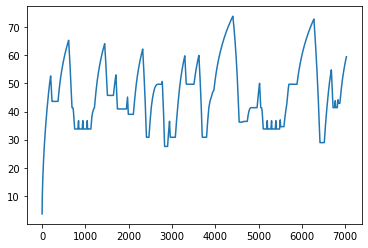

In [6]:
plt.plot(base['speed'])

In [24]:
# Torque = speed x factor_1 / lateralAcceleration * power * exp(gearRatio) / ln(elapsedDistance)

filtro = base['speed'] > 37


factor_1 = 0.65
base['Torque_real'] = np.nan

base.loc[filtro, 'Torque_real'] = base.loc[filtro, 'speed'] * factor_1 * base.loc[filtro, 'lateralAcceleration'] * base.loc[filtro, 'power'] \
    * np.exp(base.loc[filtro, 'gearRatio']) * np.log(base.loc[filtro, 'elapsedDistance'])

In [25]:
base[['speed', 'Torque_real']].head(100)

,speed,Torque_real
0,3.600000,NaN
1,3.635040,NaN
2,5.628689,NaN
3,6.915926,NaN
4,7.963381,NaN
...,...,...
95,37.188948,7.458582e+06
96,37.380762,7.702813e+06
97,37.571560,7.953207e+06
98,37.761358,8.209903e+06


In [26]:
base['Dirichlet'] = base['Torque_real'] ** np.pi

In [27]:
nova_base = base[['speed', 'Dirichlet','Torque_real']]

In [28]:
nova_base.head(100)

,speed,Dirichlet,Torque_real
0,3.600000,NaN,NaN
1,3.635040,NaN,NaN
2,5.628689,NaN,NaN
3,6.915926,NaN,NaN
4,7.963381,NaN,NaN
...,...,...,...
95,37.188948,3.900197e+21,7.458582e+06
96,37.380762,4.315657e+21,7.702813e+06
97,37.571560,4.771917e+21,7.953207e+06
98,37.761358,5.272707e+21,8.209903e+06


<AxesSubplot:>

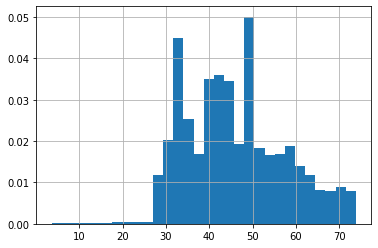

In [29]:
base['speed'].hist(bins=30, density=True)

In [46]:
base['aceleracao'] = np.gradient(base['speed'], base['elapsedTime'])

# ACELERAÇÃO

In [55]:
def calcula_derivada_numerica(y1, y0, x1, x0):
    derivada = (y1-y0)/(x1-x0)
    return derivada

In [56]:
base['speed_0'] = base['speed'].shift(1)
base['elapsedTime_0'] = base['elapsedTime'].shift(1)

In [57]:
base[['speed', 'speed_0', 'elapsedTime', 'elapsedTime_0']].head(3)

,speed,speed_0,elapsedTime,elapsedTime_0
0,3.600000,NaN,0.003714,NaN
1,3.635040,3.60000,0.103714,0.003714
2,5.628689,3.63504,0.202750,0.103714


In [75]:
base['aceleracao_calc'] = base.apply(lambda var: calcula_derivada_numerica(y1=var['speed'], y0=var['speed_0'], \
                                                                      x1=var['elapsedTime'], x0=var['elapsedTime_0']), axis=1)

In [76]:
base[['aceleracao_calc', 'longitudinalAcceleration','speed', 'speed_0', 'elapsedTime', 'elapsedTime_0']]

,aceleracao_calc,longitudinalAcceleration,speed,speed_0,elapsedTime,elapsedTime_0
0,NaN,0.392464,3.600000,NaN,0.003714,NaN
1,0.350404,0.097335,3.635040,3.600000,0.103714,0.003714
2,20.130534,5.591815,5.628689,3.635040,0.202750,0.103714
3,20.126279,5.590633,6.915926,5.628689,0.266708,0.202750
4,20.122558,5.589599,7.963381,6.915926,0.318761,0.266708
...,...,...,...,...,...,...
7024,11.720760,3.255767,59.186784,59.115407,58.806550,58.800461
7025,11.687948,3.246652,59.257876,59.186784,58.812633,58.806550
7026,11.655266,3.237574,59.328683,59.257876,58.818708,58.812633
7027,11.622712,3.228531,59.399208,59.328683,58.824776,58.818708


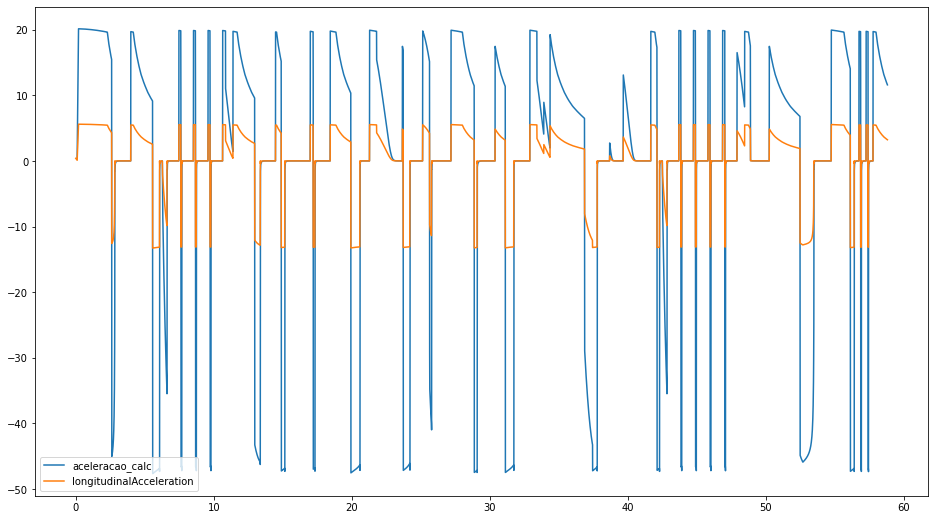

In [78]:
plt.figure(figsize=(16,9))

x1 = base['elapsedTime']
y1 = base['aceleracao_calc']

x2 = x1
y2 = base['longitudinalAcceleration']

plt.plot(x1, y1)
plt.plot(x2, y2)

plt.legend(["aceleracao_calc", "longitudinalAcceleration"])

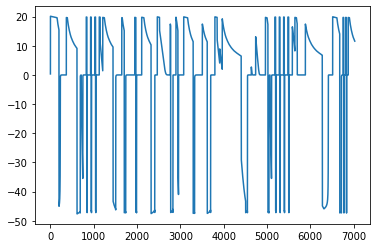

In [77]:
plt.plot(base['aceleracao_calc'], )

## fim teste

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [99]:
kpi_values = pd.read_csv('teste3.csv', skiprows=8, sep=";", nrows=143, header=None)

In [100]:
kpi_values[:]

,0,1,2
0,Lap time [s],58.830837,NaN
1,Percent in Corners [%],68.331488,NaN
2,Percent Accelerating [%],50.436244,NaN
3,Percent Braking [%],49.138066,NaN
4,Percent Coasting [%],0.048516,NaN
...,...,...,...
138,Minimum Speed in Sector 39 [km/h],41.369645,NaN
139,Minimum Speed in Sector 40 [km/h],41.712449,NaN
140,Minimum Speed in Sector 41 [km/h],42.945115,NaN
141,Minimum Speed in Sector 42 [km/h],43.274881,NaN


In [101]:
kpi_values = kpi_values.set_index(0)[[1]]

In [102]:
kpi_values[:]

,1
0,
Lap time [s],58.830837
Percent in Corners [%],68.331488
Percent Accelerating [%],50.436244
Percent Braking [%],49.138066
Percent Coasting [%],0.048516
...,...
Minimum Speed in Sector 39 [km/h],41.369645
Minimum Speed in Sector 40 [km/h],41.712449
Minimum Speed in Sector 41 [km/h],42.945115


In [105]:
energy = kpi_values.loc['Energy Spent [kJ]', 1]

In [106]:
energy

516.559755958668

In [67]:
vehicle_parameters = pd.read_csv('teste3.csv', skiprows=153, sep=";", nrows=24, header=None)
vehicle_parameters = vehicle_parameters.set_index(0)[[1]]
vehicle_parameters[:]

,1
0,
Vehicle Mass [kg],357.000000
Drag Coefficient [-],0.590000
Downforce Coefficient [-],-0.045000
Aero Efficiency [-],0.076271
Frontal Area [m^2],0.820000
Drivetrain Efficiency [%],92.380000
Tire Rolling Radius [m],0.254000
Air Density [kg/m^3],1.227000
Rev Limit [rpm],9000.000000


In [68]:
vehicle_kpis = pd.read_csv('teste3.csv', skiprows=179, sep=";", nrows=5, header=None)
vehicle_kpis = vehicle_kpis.set_index(0)[[1]]
vehicle_kpis[:]

,1
0,
"Deceleration Time For Speed [27,778 km/h] [s]",0.000000
"Deceleration Distance For Speed [27,778 km/h] [m]",0.000000
Top Speed [km/h],96.940573
"Acceleration Time To Speed [27,778 km/h] [s]",0.000000
Acceleration Time For Distance [100 m] [s],39.605005


In [125]:
simulation_results = pd.read_csv('teste3.csv', skiprows=186, sep=";")

In [126]:
simulation_results

,speed,elapsedTime,elapsedDistance,lateralAcceleration,longitudinalAcceleration,gear,gearRatio,engineSpeed,torque,power,downForce,dragForce,tractionControl,throttlePosition,brakePosition,cornerRadius,sectorIndex,maximumCornerSpeed,loadSensitiveLatGrip,loadSensitiveLongGrip,yawangle,yawvelocity,yawacceleration,xposition,yposition,trackelevation,fz,Unnamed: 27
0,Speed (linear),Time,Length,Acceleration (linear),Acceleration (linear),Unitless,Unitless,Speed (angular),Torque,Power,Force,Force,Ratio,Ratio,Ratio,Length,Unitless,Speed (linear),Unitless,Unitless,Angle,Speed (angular),Acceleration (angular),Length,Length,Length,Force,NaN
1,km/h,s,m,m/s^2,m/s^2,-,-,rpm,N.m,hp,N,N,%,%,%,m,-,km/h,-,-,deg,rpm,deg/s^2,m,m,m,N,NaN
2,3.6,0.00371361533881089,0.1,2.42724745056923,0.392464040211765,1,8.89,1,15.6,19.7165833287418,-0.02263815,215.221967469041,0,58.5704414697494,0,298.739130434783,1,96.9405733107708,1.5,1.3,0,0,0,-0.0999844755472975,0.00176197507247602,0,3502.14736185,NaN
3,3.63504043381523,0.103713615338811,0.2,0.00342734842142223,0.0973345383756303,1,8.89,337.478547805351,65,3.08052032845692,-0.0230809895171149,0.302617418113284,0,99.9866981354675,0,297.478260869565,1,96.9405733107708,1.3,1.5,0.0192195011507793,0.0275144582729187,0.0288130733259014,-0.199969534066616,0.00349055215187093,0,3502.14691901048,NaN
4,5.62868876994689,0.20274965264147,0.3,0.00825275432480778,5.59181505605482,1,8.89,522.569623836685,65,4.77004052474316,-0.0553414333190234,0.725587681293862,0,99.9681060359871,0,296.217391304348,1,96.9405733107708,1.3,1.5,0.0385206354711478,0.0407747696472069,0.0140213259511001,-0.299955166796705,0.00518558978900694,0,3502.11465856668,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,59.1867842966108,58.8065503898338,702.500000000091,0,3.25576661607863,1,8.89,5494.92375046963,41.5725178504338,32.0798663016192,-6.11906999747695,80.2278066335867,0,100,0,0,42,0,1.5,1.3,-111.110739860626,6.34823384708274E-70,-2.18328140638331E-68,56.7724810876553,-106.376434006247,0,3496.05093000252,NaN
7027,59.257875528914,58.8126328287478,702.600000000091,0,3.24665233928407,1,8.89,5501.52388773804,41.4782301751708,32.0455530466899,-6.13377846612357,80.4206510002868,0,100,0,0,42,0,1.5,1.3,-111.110739860626,2.11607794902758E-70,-7.28639178361081E-69,56.8101054417243,-106.283781925963,0,3496.03622153388,NaN
7028,59.3286829232653,58.8187079706051,702.700000000091,0,3.23757388965685,1,8.89,5508.09767338215,41.3843189516836,32.0112030514869,-6.14844576055599,80.6129555272896,0,100,0,0,42,0,1.5,1.3,-111.110739860626,7.05359316342526E-71,-2.43171457107887E-69,56.8477297957932,-106.19112984568,0,3496.02155423944,NaN
7029,59.39920827502,58.8247758619228,702.800000000091,0,3.22853104344626,1,8.89,5514.64527408343,41.2907817988081,31.9768175236389,-6.16307204269708,80.804722337584,0,100,0,0,42,0,1.5,1.3,-111.110739860626,0,-1.21731011666987E-69,56.8853541498621,-106.098477765396,0,3496.0069279573,NaN


In [127]:
simulation_results = simulation_results.drop([0, 1])

In [128]:
for column in simulation_results:
    simulation_results[column] = simulation_results[column].astype(float)

In [129]:
simulation_results.dtypes

speed                       float64
elapsedTime                 float64
elapsedDistance             float64
lateralAcceleration         float64
longitudinalAcceleration    float64
gear                        float64
gearRatio                   float64
engineSpeed                 float64
torque                      float64
power                       float64
downForce                   float64
dragForce                   float64
tractionControl             float64
throttlePosition            float64
brakePosition               float64
cornerRadius                float64
sectorIndex                 float64
maximumCornerSpeed          float64
loadSensitiveLatGrip        float64
loadSensitiveLongGrip       float64
yawangle                    float64
yawvelocity                 float64
yawacceleration             float64
xposition                   float64
yposition                   float64
trackelevation              float64
fz                          float64
Unnamed: 27                 

In [130]:
simulation_results

,speed,elapsedTime,elapsedDistance,lateralAcceleration,longitudinalAcceleration,gear,gearRatio,engineSpeed,torque,power,downForce,dragForce,tractionControl,throttlePosition,brakePosition,cornerRadius,sectorIndex,maximumCornerSpeed,loadSensitiveLatGrip,loadSensitiveLongGrip,yawangle,yawvelocity,yawacceleration,xposition,yposition,trackelevation,fz,Unnamed: 27
2,3.600000,0.003714,0.1,2.427247,0.392464,1.0,8.89,1.000000,15.600000,19.716583,-0.022638,215.221967,0.0,58.570441,0.0,298.739130,1.0,96.940573,1.5,1.3,0.000000,0.000000e+00,0.000000e+00,-0.099984,0.001762,0.0,3502.147362,NaN
3,3.635040,0.103714,0.2,0.003427,0.097335,1.0,8.89,337.478548,65.000000,3.080520,-0.023081,0.302617,0.0,99.986698,0.0,297.478261,1.0,96.940573,1.3,1.5,0.019220,2.751446e-02,2.881307e-02,-0.199970,0.003491,0.0,3502.146919,NaN
4,5.628689,0.202750,0.3,0.008253,5.591815,1.0,8.89,522.569624,65.000000,4.770041,-0.055341,0.725588,0.0,99.968106,0.0,296.217391,1.0,96.940573,1.3,1.5,0.038521,4.077477e-02,1.402133e-02,-0.299955,0.005186,0.0,3502.114659,NaN
5,6.915926,0.266708,0.4,0.012512,5.590633,1.0,8.89,642.077265,65.000000,5.860912,-0.083548,1.095409,0.0,99.951850,0.0,294.956522,1.0,96.940573,1.3,1.5,0.057904,5.445418e-02,2.239756e-02,-0.399941,0.006847,0.0,3502.086452,NaN
6,7.963381,0.318761,0.5,0.016661,5.589599,1.0,8.89,739.323377,65.000000,6.748579,-0.110772,1.452347,0.0,99.936161,0.0,293.695652,1.0,96.940573,1.3,1.5,0.077371,6.581277e-02,2.285079e-02,-0.499928,0.008474,0.0,3502.059228,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,59.186784,58.806550,702.5,0.000000,3.255767,1.0,8.89,5494.923750,41.572518,32.079866,-6.119070,80.227807,0.0,100.000000,0.0,0.000000,42.0,0.000000,1.5,1.3,-111.110740,6.348234e-70,-2.183281e-68,56.772481,-106.376434,0.0,3496.050930,NaN
7027,59.257876,58.812633,702.6,0.000000,3.246652,1.0,8.89,5501.523888,41.478230,32.045553,-6.133778,80.420651,0.0,100.000000,0.0,0.000000,42.0,0.000000,1.5,1.3,-111.110740,2.116078e-70,-7.286392e-69,56.810105,-106.283782,0.0,3496.036222,NaN
7028,59.328683,58.818708,702.7,0.000000,3.237574,1.0,8.89,5508.097673,41.384319,32.011203,-6.148446,80.612956,0.0,100.000000,0.0,0.000000,42.0,0.000000,1.5,1.3,-111.110740,7.053593e-71,-2.431715e-69,56.847730,-106.191130,0.0,3496.021554,NaN
7029,59.399208,58.824776,702.8,0.000000,3.228531,1.0,8.89,5514.645274,41.290782,31.976818,-6.163072,80.804722,0.0,100.000000,0.0,0.000000,42.0,0.000000,1.5,1.3,-111.110740,0.000000e+00,-1.217310e-69,56.885354,-106.098478,0.0,3496.006928,NaN


In [131]:
simulation_results['speed_quadrado'] = simulation_results['speed'] ** 2